**Свойства набора данных**

Общий набор данных CAMUS состоит из клинических обследований 500 пациентов, полученных в Университетской больнице Сент-Этьена (Франция) и включенных в это исследование в рамках регламента, установленного местным этическим комитетом больницы, после полной анонимизации. Полученные данные были оптимизированы для измерения фракции выброса левого желудочка. Чтобы обеспечить клинический реализм, не выполнялись ни предварительные условия, ни выбор данных. Следовательно,
* некоторые случаи было трудно отследить;
* набор данных включает в себя широкий диапазон настроек сбора данных;
* у некоторых пациентов части стенки не были видны на изображениях;
* в некоторых случаях рекомендации по ориентации зонда для получения строгого четырехкамерного изображения было просто невозможно выполнить, и вместо этого была получена пятикамерная проекция. 

В результате был получен весьма неоднородный набор данных как с точки зрения качества изображений, так и с точки зрения патологических случаев, что типично для данных повседневной клинической практики.

Набор данных доступен сообществу ЗДЕСЬ. Набор данных включает в себя: 

* i) обучающую выборку из 450 пациентов вместе с соответствующими справочниками, основанными на анализе одного клинического эксперта; 
* ii) набор для тестирования, состоящий из 50 новых пациентов. Необработанные входные изображения предоставляются в формате файла raw/mhd.

---

**Исследуемая популяция**

Половина популяции набора данных имеет фракцию ***выброса левого желудочка ниже 45%***, поэтому считается, что она находится в группе патологического риска (за пределами неопределенности измерения). Также 19% изображений имеют низкое качество (по мнению одного эксперта), что указывает на то, что для этой подгруппы локализация эндокария левого желудочка и эпикарда левого желудочка, а также оценка клинических показателей не считаются клинически достоверными. и работоспособен. При классическом анализе изображения низкого качества обычно удаляются из набора данных из-за их клинической бесполезности. Поэтому эти данные не использовались в этом проекте при вычислении различных показателей, а использовались для изучения их влияния в рамках наборов обучения и проверки методов глубокого обучения.

---

**Задействованные системы**

Полный набор данных был получен с помощью ультразвуковых сканеров GE Vivid E95 (GE Vingmed Ultrasound, Horten Норвегия) с датчиком GE M5S (GE Healthcare, США). Никакого дополнительного протокола, кроме того, который используется в клинической практике, не применялось. Для каждого пациента 2D-последовательности апикальных четырехкамерных и двухкамерных изображений были экспортированы из программного обеспечения для анализа EchoPAC (GE Vingmed Ultrasound, Хортен, Норвегия). Эти стандартные изображения сердца были выбраны для этого исследования, чтобы обеспечить оценку значений фракции выброса левого желудочка на основе бипланового метода дисков Симпсона. Каждая экспортированная последовательность соответствует набору изображений в B-режиме, выраженных в полярных координатах. Одна и та же процедура интерполяции использовалась для выражения всех последовательностей в декартовых координатах с уникальным разрешением сетки, т.е. λ/2 = 0,3 мм вдоль оси x (ось, параллельная датчику) и λ/4 = 0,15 мм вдоль оси z. (ось, перпендикулярная зонду), где λ соответствует длине волны ультразвукового зонда. По крайней мере, один полный сердечный цикл был получен для каждого пациента в каждом представлении, что позволяет вручную аннотировать сердечные структуры при неотложной и ЭС.

---

*This work has published to IEEE TMI journal. You must cite this paper for any use of the CAMUS database.*

    S. Leclerc, E. Smistad, J. Pedrosa, A. Ostvik, et al. "Deep Learning for Segmentation using an Open Large-Scale Dataset in 2D Echocardiography" in IEEE Transactions on Medical Imaging, vol. 38, no. 9, pp. 2198-2210, Sept. 2019. doi: 10.1109/TMI.2019.2900516

## Установка библиотек

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from zipfile import ZipFile
import nibabel as nib
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import keras
import imageio.v2 as imageio
import cv2
import albumentations as A

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2DTranspose, BatchNormalization, ReLU, Conv2D, UpSampling2D, MaxPool2D, Dropout
from keras import Input, Model

/kaggle/input
/kaggle/input/camus-human-heart-data
/kaggle/input/echo-ekg
/kaggle/input/hmcqu-dataset
/kaggle/input/hmcqu-dataset/HMC-QU-TAU
/kaggle/input/hmcqu-dataset/HMC-QU-TAU/2CH_Extension
/kaggle/input/hmcqu-dataset/HMC-QU
/kaggle/input/hmcqu-dataset/HMC-QU/A4C
/kaggle/input/hmcqu-dataset/HMC-QU/A2C
/kaggle/input/hmcqu-dataset/LV Ground-truth Segmentation Masks


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Подготовка датасета 

In [2]:
ZIP_FILE = '/kaggle/input/camus-human-heart-data/download'
WORK_PATH = '/kaggle/working/'

In [3]:
with ZipFile(ZIP_FILE, "r") as myzip:
    myzip.extractall(WORK_PATH)

In [4]:
# просмотр изображений из nii

def nii_show(path, num_to_plot=9999):
    '''
    path/*.nii.gz
    '''
    img = nib.load(path)
    nii_data = img.get_fdata()
    nii_aff  = img.affine
    nii_hdr  = img.header
    print(nii_data.shape)
    if(len(nii_data.shape)==3):
        for slice_Number in range(num_to_plot):
            plt.imshow(nii_data[:,:,slice_Number ])
            plt.show()
    if(len(nii_data.shape)==4):
        for frame in range(nii_data.shape[3]):
            for slice_Number in range(num_to_plot):
                plt.imshow(nii_data[:,:,slice_Number,frame])
                plt.show()
    if(len(nii_data.shape)==2):
        plt.imshow(nii_data[:,:])
        plt.show()
        
    print(nii_aff ,'\n',nii_hdr)

(512, 422)


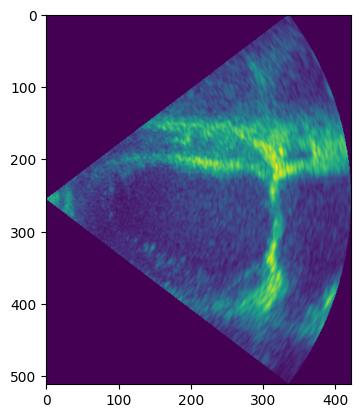

[[-0.308  0.     0.    -0.   ]
 [ 0.    -0.308  0.    -0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]] 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  2 512 422   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    0.308 0.308 1.    0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c    

In [5]:
nii_show('/kaggle/working/database_nifti/patient0274/patient0274_2CH_ES.nii.gz')

(512, 422)


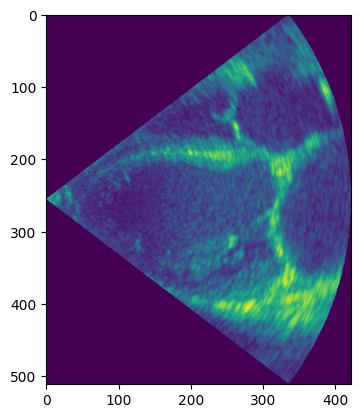

[[-0.308  0.     0.    -0.   ]
 [ 0.    -0.308  0.    -0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]] 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  2 512 422   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    0.308 0.308 1.    0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c    

In [6]:
nii_show('/kaggle/working/database_nifti/patient0274/patient0274_4CH_ES.nii.gz')

(512, 422)


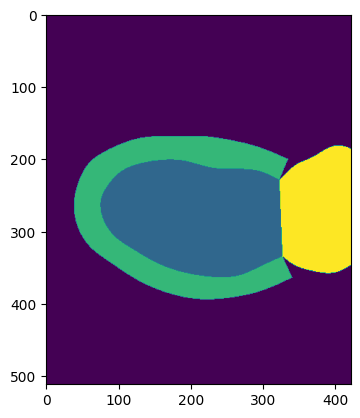

[[-0.308  0.     0.    -0.   ]
 [ 0.    -0.308  0.    -0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]] 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  2 512 422   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    0.308 0.308 1.    0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c    

In [7]:
nii_show('/kaggle/working/database_nifti/patient0274/patient0274_4CH_ES_gt.nii.gz')

In [8]:
#masks_2ch '/kaggle/working/database_nifti/patient0272/patient0272_2CH_half_sequence_gt.nii.gz'
#img_2ch   '/kaggle/working/database_nifti/patient0272/patient0272_2CH_half_sequence.nii.gz'
#masks_4ch '/kaggle/working/database_nifti/patient0272/patient0272_4CH_half_sequence_gt.nii.gz'
#img_4ch   '/kaggle/working/database_nifti/patient0272/patient0272_4CH_half_sequence.nii.gz'

In [9]:
from tqdm import tqdm

In [10]:
def nii_to_array(dirname:str, f:str, desired_size:tuple=(256,256)):
    '''
    распаковка nii в np.arrray снормализацией и изменением размера
    '''
    img = nib.load(os.path.join(dirname, f))
    nii_data = img.get_fdata().T
    # drop else masks
#     print(f)
    res = []
    for num in range(nii_data.shape[0]):
        heart_pic=[]
        im_data = nii_data[num,:,:]
        if f.endswith('gt.nii.gz'):
            im_data = np.where(im_data>1,0,im_data)
        else:
            im_data = im_data
        im_data = np.expand_dims(im_data, axis=-1)
        
        im_data = cv2.resize(im_data, desired_size, interpolation=cv2.INTER_NEAREST)
        
        im_data -= im_data.min()
        im_data /= im_data.max()
        
        im_data *= 255.0
        im_data = im_data.astype('uint8')
        im_data = im_data / 255.0
        res.append(im_data)
    
    return res

In [87]:
def augment(image:np.array, mask:np.array) -> tuple:
    '''
    Combine image masks augmentation
    '''
    aug = A.Compose([
        A.RandomGamma(p=0.5),
        A.ElasticTransform(p=0.5, alpha=40, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        A.HorizontalFlip(p=0.5),
    #     A.VerticalFlip(p=0.5),              
        A.PadIfNeeded(min_height=350, min_width=350, p=0.5, border_mode=0),
        A.ShiftScaleRotate (p=0.3),
    #     A.RandomCrop (height=450, width=450, p=0.5), #, scale=(0.15, 0.15)
        A.PadIfNeeded(min_height=256, min_width=256, p=1, border_mode=0),

#         A.GaussNoise(var_limit=(500, 500), p=0.2),
        A.OneOf([
            A.Sharpen(p=0.5),
            A.Blur(blur_limit=6, p=0.5),
        ], p=0.3),
        A.RandomCrop (256, 256, always_apply=True)
#         A.OneOf([
# #             A.CLAHE(clip_limit=4),
#             A.RandomBrightnessContrast(),
#         ], p=0.3),
#         A.HueSaturationValue(p=0.3),
    ])

    
    augmented = aug(image=image, mask=mask)    
#     augmented['image'] = aug_for_img_only(image=augmented['image'])
    
    return augmented['image'], augmented['mask']

In [61]:
def add_noise(img:np.array) -> np.array:
    'add random noise to black pix'
    # Создание маски для черных областей
    mask = img == 0
    # Генерация случайного шума для черных областей
    noise = np.random.randint(0, 2, img.shape, dtype=np.uint8)
    # Копирование оригинального изображения
    result = np.copy(img)
    # Замена черных областей на случайный шум
    result[mask] = noise[mask]
    return result

In [149]:
def path_to_arrays(path:str) -> tuple:
    # преобразование файлов в np.array
    hearts_msks = []
    hearts_img = []
    counter = 0
    len_sum_msks = 0
    len_sum_img = 0

    # прооход по папкам
    for dirname, _, filenames in tqdm(os.walk(path)):
        if dirname.split('/')[-1].startswith('patient'):
            # счетчик для теста
            if counter <= 1000:
                counter+=1
                for f in filenames:
                    if f.endswith('half_sequence_gt.nii.gz'):
                        # в папках встречается количество масок не соответствует количеству изображений
                        patient_msks = nii_to_array(dirname, f)
                        patient_img = nii_to_array(dirname, f.replace('_gt',''))
                        min_len = min(len(patient_msks),len(patient_img))
    #                     print(len(patient_msks),len(patient_img), min_len)
#                         for i in range(min_len):
                        for i in [0, int(min_len/2)]:
    #                         print(patient_msks[i].shape)
#                             aug_msks, aug_img = augment(patient_msks[i], patient_img[i])
                            hearts_msks.append(patient_msks[i])
                            hearts_img.append(patient_img[i])
#                             hearts_msks.append(aug_msks)
#                             hearts_img.append(aug_img)
    #                     print(f'folder: {dirname}, file: {f}, mask_shape: {np.array(patient_msks).shape}, hearts_msks: {np.array(hearts_msks).shape}')
    #                     print(f'folder: {dirname}, file: {f.replace("_gt","")}, img_shape: {np.array(patient_img).shape}, hearts_img: {np.array(hearts_img).shape}')

#     plt.imshow(hearts_img[0])
    # перемешивание масок со своим изображением
    # shuffle
    combined = list(zip(hearts_img, hearts_msks))
#     print(np.array(combined).shape)
#     print(np.mean(combined[0]))
    np.random.shuffle(combined)
#     print(np.mean(combined[0]))
    images, masks = zip(*combined)

    # to arrays
    images = np.array(images)#, np.uint8)
    masks = np.array(masks)#, np.uint8)

    return images, masks

In [150]:
images, masks = path_to_arrays('/kaggle/working/database_nifti')

501it [03:19,  2.51it/s]


In [151]:
images[0].shape, len(images)

((256, 256), 2000)

In [152]:
# делим трейн  тест
# images = augmented_images
# masks = augmented_masks

# Calculate the number of images in each split
num_images = len(images)
num_train = int(0.70 * num_images)
num_val = int(0.15 * num_images)
num_test = num_images - num_train - num_val

# Split train, val, and test
train_images = images[:num_train]
train_masks = masks[:num_train]
val_images = images[num_train:num_train+num_val]
val_masks = masks[num_train:num_train+num_val]
test_images = images[num_train+num_val:]
test_masks = masks[num_train+num_val:]

train_images = np.expand_dims(train_images, axis=-1)
train_masks = np.expand_dims(train_masks, axis=-1)
val_images = np.expand_dims(val_images, axis=-1)
val_masks = np.expand_dims(val_masks, axis=-1)

train_images.shape

train_images.shape, val_images.shape, test_images.shape

((1400, 256, 256, 1), (300, 256, 256, 1), (300, 256, 256))

In [153]:
def aug_img_msk(train_images, train_masks):
    aug_train_images = []
    aug_train_masks = []
    for i in tqdm(range(len(train_images))):
        aug_img, aug_msks = augment(train_images[i], train_masks[i])
#         aug_img = augment_img(aug_img)
        aug_train_images.append(aug_img)
        aug_train_masks.append(aug_msks)

    return aug_train_images, aug_train_masks

In [128]:
# for i in tqdm(range(val_images.shape[0])):
#     val_images[i] = add_noise(val_images[i])

# for i in tqdm(range(train_images.shape[0])):
#     train_images[i] = add_noise(train_images[i])
    
# for i in tqdm(range(test_images.shape[0])):
#     test_images[i] = add_noise(test_images[i])

100%|██████████| 1400/1400 [00:00<00:00, 2592.27it/s]


In [154]:
aug_img, aug_msks = aug_img_msk(train_images, train_masks)

100%|██████████| 1400/1400 [00:25<00:00, 54.50it/s]


In [155]:
for i in tqdm(range(len(aug_img))):
    aug_img[i] = add_noise(aug_img[i])

100%|██████████| 1400/1400 [00:00<00:00, 2551.27it/s]


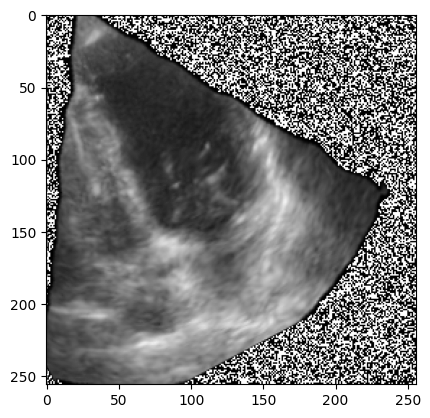

In [157]:
plt.imshow(aug_img[0], cmap='gray')

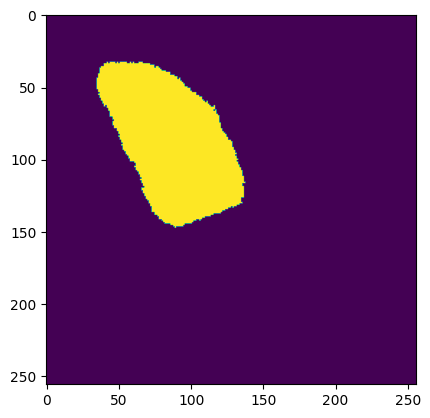

In [158]:
plt.imshow(aug_msks[0])

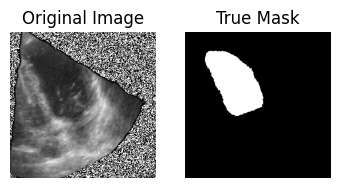

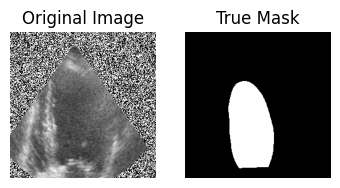

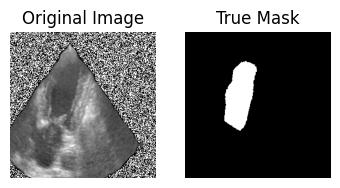

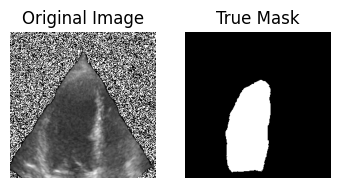

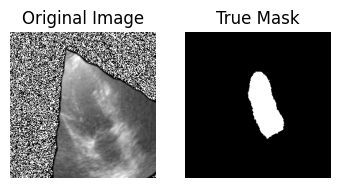

In [159]:
# Визуализация результатов
for i in range(5):
    # Вывод исходного изображения
    plt.subplot(1, 3, 1)
    plt.imshow(aug_img[i], cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Вывод маски (истинное значение)
    plt.subplot(1, 3, 2)
    plt.imshow(aug_msks[i], cmap='gray')
    plt.title('True Mask')
    plt.axis('off')

#     # Вывод предсказанной маски
#     plt.subplot(1, 3, 3)
#     plt.imshow(predictions[i], cmap='gray')
#     plt.title('Predicted Mask')
#     plt.axis('off')

    plt.show()

# Model

In [179]:
# DeepUNet https://arxiv.org/abs/1709.00201


def create_upsample_layer(filters, kernel_size, padding='same', kernel_initializer='he_normal'):
    """ This function creates a layer that upsamples an input tensor using a convolutional, batch
    normalization, and ReLU activation, followed by an upsampling operation. """
    def layer(x):
        x = Conv2D(filters, kernel_size, padding=padding, kernel_initializer=kernel_initializer)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = UpSampling2D(size=(2, 2))(x)
        return x
    return layer

def create_downsample_layer(filters, kernel_size, padding='same', kernel_initializer='he_normal'):
    """ This function creates a layer that downsamples an input tensor using a convolutional, batch
    normalization, and ReLU activation, followed by a max pooling operation. """
    def layer(x):
        x = Conv2D(filters, kernel_size, padding=padding, kernel_initializer=kernel_initializer)(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = MaxPool2D(pool_size=(2, 2))(x)
        return x
    return layer

dropout_rate = 0.12

# Input
inputs = Input(shape=(256, 256, 1))



# Encoder part
x = create_downsample_layer(64, 3, padding='same', kernel_initializer='he_normal')(inputs)
x = create_downsample_layer(128, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(256, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(512, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(1024, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_downsample_layer(2048, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)

# Decoder part
x = create_upsample_layer(1024, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(512, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(256, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(128, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(64, 3, padding='same', kernel_initializer='he_normal')(x)
x = Dropout(dropout_rate)(x)
x = create_upsample_layer(32, 3, padding='same', kernel_initializer='he_normal')(x)
# outputs = Conv2D(1, 1, padding = 'same', activation='sigmoid')(x)
outputs = Conv2D(1, 1, padding = 'same', activation='sigmoid')(x)


model = Model(inputs=inputs, outputs=outputs)

In [180]:
# Early stopping and reduce learning rate
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1,
                           mode='auto', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,
                              verbose=1, mode='auto')

In [181]:
# Set the optimizer for the model
optimizer = tf.keras.optimizers.Adam(lr=0.0001)

# Compile the model with loss function and metrics
model.compile(
    optimizer=optimizer, 
    loss='binary_crossentropy',
#     metrics=['accuracy'],
    metrics = ['accuracy','AUC','Precision','Recall']
)

In [182]:
# # Создание Dataset
# train_dataset = tf.data.Dataset.from_tensor_slices((aug_img, aug_msks))
# val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_masks))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_masks))

# Подготовка данных для обучения (например, батчирование и перемешивание)
batch_size = 16
train_dataset = train_dataset.batch(batch_size).shuffle(32)

In [163]:
aug_img_ar = np.array(aug_img)
aug_msks_ar = np.array(aug_msks)

In [183]:
type(val_images), val_images.shape

(numpy.ndarray, (300, 256, 256, 1))

In [184]:
type(aug_img_ar), aug_img_ar.shape

(numpy.ndarray, (1400, 256, 256, 1))

In [185]:
num_epochs = 60
tf.random.set_seed(1)
history = model.fit(
#     train_dataset,
    aug_img_ar, aug_msks_ar,
#     train_images,
#     train_masks,
    batch_size=batch_size, epochs=num_epochs,
    callbacks=[early_stop, reduce_lr],
    validation_data=(val_images, val_masks))

Epoch 1/60


2024-02-27 09:00:56.087885: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/dropout_30/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


88/88 [==============================] - 24s 177ms/step - loss: 0.2841 - accuracy: 0.9179 - auc: 0.9243 - precision: 0.5781 - recall: 0.6826 - val_loss: 2.3352 - val_accuracy: 0.6666 - val_auc: 0.5488 - val_precision: 0.1499 - val_recall: 0.4828 - lr: 0.0010
Epoch 2/60
88/88 [==============================] - 15s 168ms/step - loss: 0.1329 - accuracy: 0.9576 - auc: 0.9795 - precision: 0.7946 - recall: 0.7810 - val_loss: 0.8869 - val_accuracy: 0.8428 - val_auc: 0.7577 - val_precision: 0.3210 - val_recall: 0.4800 - lr: 0.0010
Epoch 3/60
88/88 [==============================] - 15s 169ms/step - loss: 0.0982 - accuracy: 0.9656 - auc: 0.9868 - precision: 0.8428 - recall: 0.8090 - val_loss: 0.3928 - val_accuracy: 0.8742 - val_auc: 0.8560 - val_precision: 0.4176 - val_recall: 0.5783 - lr: 0.0010
Epoch 4/60
88/88 [==============================] - 15s 169ms/step - loss: 0.0830 - accuracy: 0.9688 - auc: 0.9899 - precision: 0.8561 - recall: 0.8296 - val_loss: 0.3215 - val_accuracy: 0.8842 - val_a

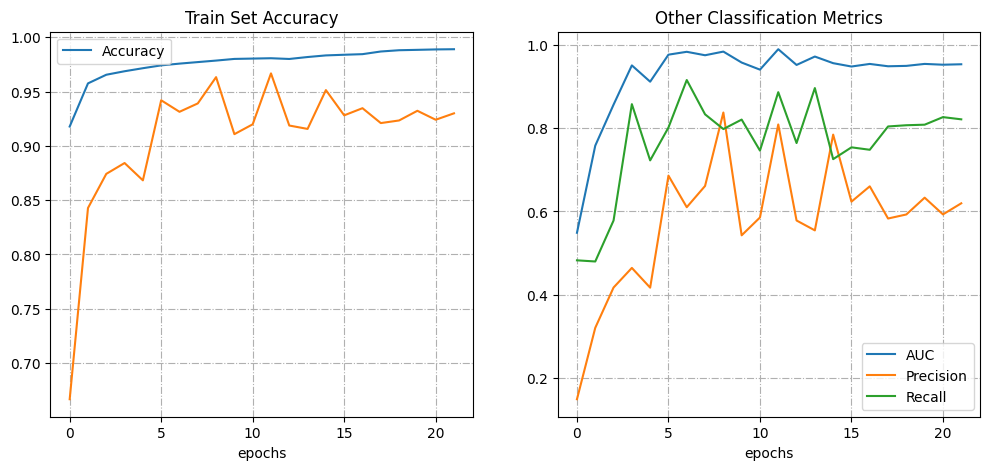

In [186]:
fig, axs = plt.subplots(1,2, figsize = (12,5), dpi = 100)

axs[0].grid(linestyle="dashdot")
axs[0].set_title("Train Set Accuracy")
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_xlabel("epochs")
axs[0].legend(["Accuracy"])


axs[1].grid(linestyle="dashdot")
axs[1].set_title("Other Classification Metrics")
axs[1].plot(history.history['val_auc'])
axs[1].plot(history.history['val_precision'])
axs[1].plot(history.history['val_recall'])
axs[1].set_xlabel("epochs")
axs[1].legend(["AUC", "Precision", "Recall"])

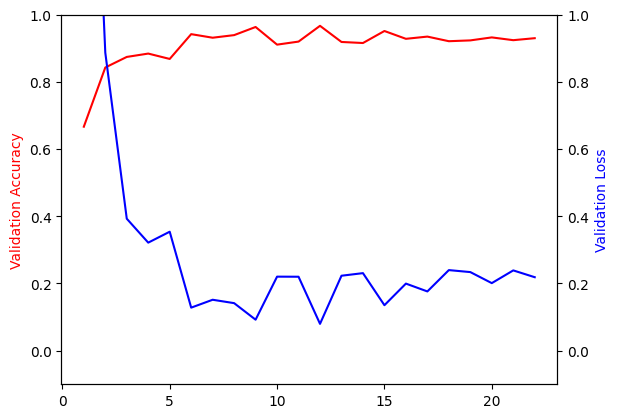

In [187]:
# Epochs and val_loss and val_accuracy
epochs_list = list(range(1, len(history.history['val_loss']) + 1))
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

ax1 = plt.subplot(111)
ax1.plot(epochs_list, val_accuracy, 'r-')
ax1.set_ylabel('Validation Accuracy', color='r')

ax2 = ax1.twinx()
ax2.plot(epochs_list, val_loss, 'b-')
ax2.set_ylabel('Validation Loss', color='b')

ax1.set_ylim([-0.1, 1])
ax2.set_ylim([-0.1, 1])

plt.show()

In [ ]:
# Saving the model to disk
model.save('test/model_heart.h5')
model.save_weights('test/model_heart_weights.h5')
# Loading the model from disk
#new_model = tf.keras.models.load_model('my_model.h5')

In [141]:
for i in range(test_images.shape[0]):
    test_images[i] = add_noise(test_images[i])

10/10 [==============================] - 1s 60ms/step


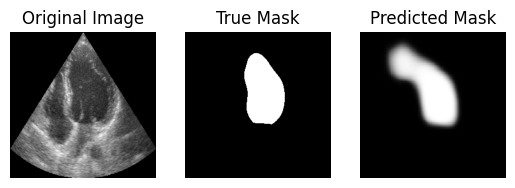

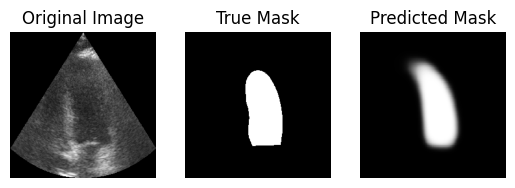

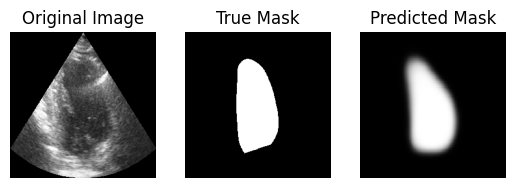

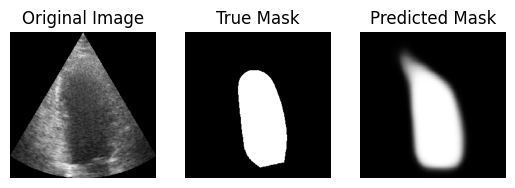

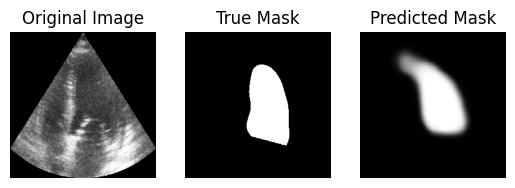

In [188]:
predictions = model.predict(test_images)

# Визуализация результатов
for i in range(5):
    # Вывод исходного изображения
    plt.subplot(1, 3, 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Вывод маски (истинное значение)
    plt.subplot(1, 3, 2)
    plt.imshow(test_masks[i], cmap='gray')
    plt.title('True Mask')
    plt.axis('off')

    # Вывод предсказанной маски
    plt.subplot(1, 3, 3)
    plt.imshow(predictions[i], cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()

In [189]:
# функция преобразования
def heart_video_info(path):
    cap = cv2.VideoCapture(path)

    # кадров в секунду
    fps = cap.get(cv2.CAP_PROP_FPS)
    print("Количество кадров в секунду:", fps)

    frames = []    
    frames_views = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        #print(frame.shape)
        # [rows, columns] 
#         frame = frame[100:600, 160:400] 
        desired_size = (256, 256)
        frame = cv2.resize(frame, desired_size, interpolation=cv2.INTER_NEAREST)
        
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_view = frame
        frames_views.append(add_noise(frame_view))
        frame = frame / 255.0
        #print(frame.max(), frame.min(), frame.mean())
#         frame = np.where(frame > 0.5, 1, 0)
        frames.append(add_noise(frame))

    frames = np.array(frames)
    
#     for i in range(frames.shape[0]):
#         frames[i] = add_noise(frames[i])

    masks = model.predict(frames, verbose=0)
    print(len(frames)==len(frames))
    # Создание пустого DataFrame для сохранения результатов
    df = pd.DataFrame(columns=['frame', 'area'])

    result = {}
    for count, mask in enumerate(masks):
        sek = count/fps
        result[count] = {}
        result[count]['sek'] = sek
        mask = np.mean(mask, axis=2)
        result[count]['l'] = np.sum(mask, axis=0).max()
        result[count]['w'] = np.sum(mask, axis=1).max()
        result[count]['s'] = np.sum(mask)

    df_res = pd.DataFrame.from_dict(result, orient='index')
    min_fr = df_res['s'].idxmin()    
    max_fr = df_res['s'].idxmax()
    
    
    print('Отношение минимального к максимальному:', df_res['s'].min() / df_res['s'].max())
    print('Отношение изменения к максимальному:', round(((df_res['s'].max() - df_res['s'].min()) / df_res['s'].max())*100, 2))
    
    plt.subplot(1, 2, 1)
    plt.imshow(frames_views[max_fr], cmap='gray')
    plt.imshow(masks[max_fr], cmap='gray', alpha=0.8)
    plt.title('MAX frame')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(frames_views[min_fr], cmap='gray')
    plt.imshow(masks[min_fr], cmap='gray', alpha=0.8)
    plt.title('MIN frame')
    plt.axis('off')
    plt.show()



    plt.figure(figsize=(20,6))
    plt.plot(df_res['s'])
    plt.title('Изменение площади')
    plt.xlabel('Время')
    plt.ylabel('Площадь в пикселях')
    plt.grid()
    plt.legend();

    plt.figure(figsize=(20,6))
    plt.plot(df_res['l'])
    plt.title('Изменение длины')
    plt.xlabel('Время')
    plt.ylabel('Длина в пикселях')
    plt.grid()
    plt.legend();

    plt.figure(figsize=(20,6))
    plt.plot(df_res['w'])
    plt.title('Изменение ширины')
    plt.xlabel('Время')
    plt.ylabel('Ширина в пикселях')
    plt.grid()
    plt.legend();

Количество кадров в секунду: 30.0
True
Отношение минимального к максимальному: 0.7363606
Отношение изменения к максимальному: 26.36


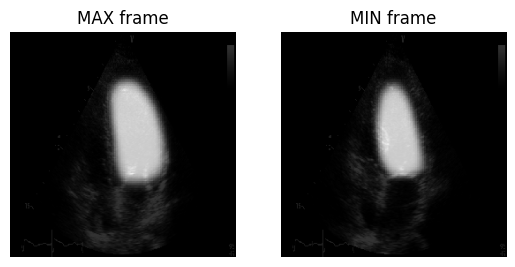

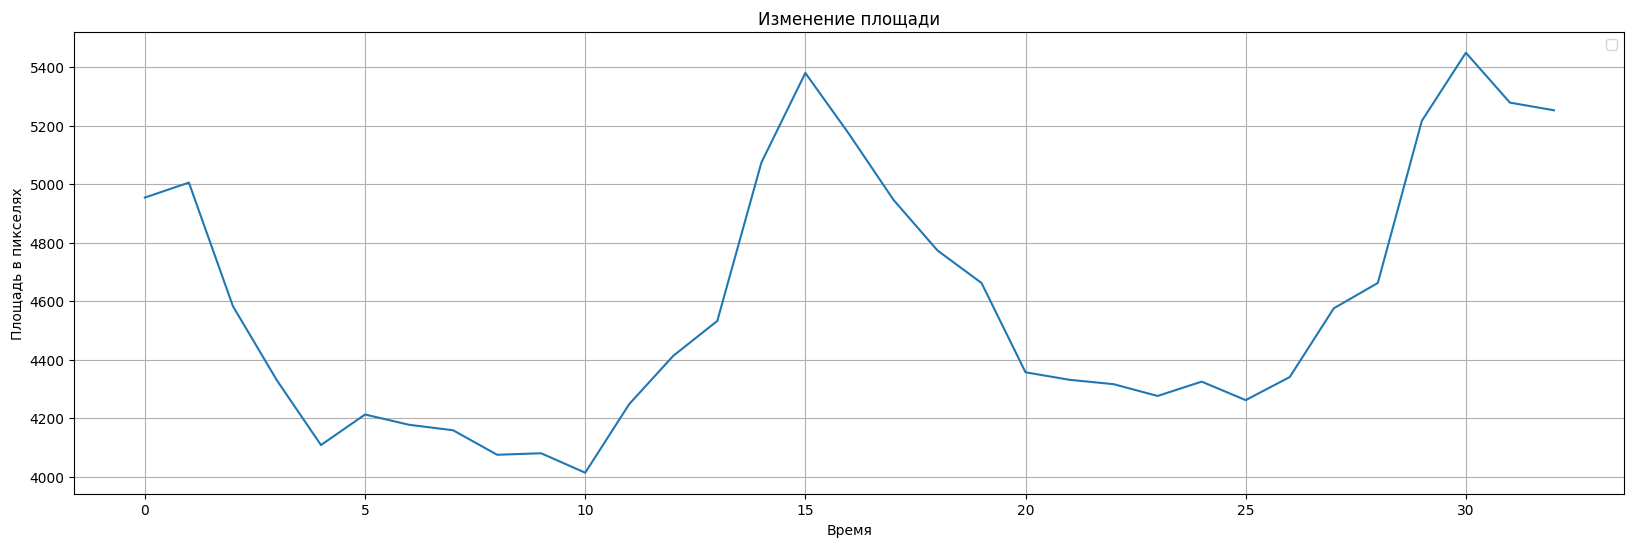

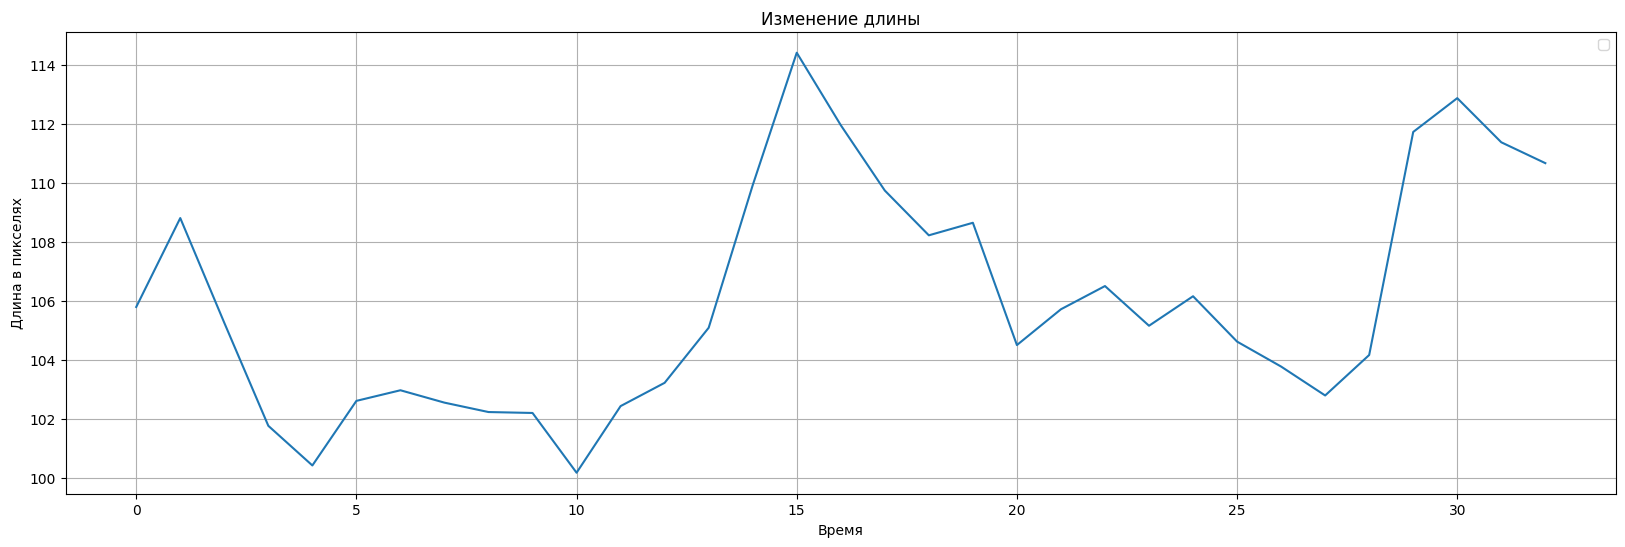

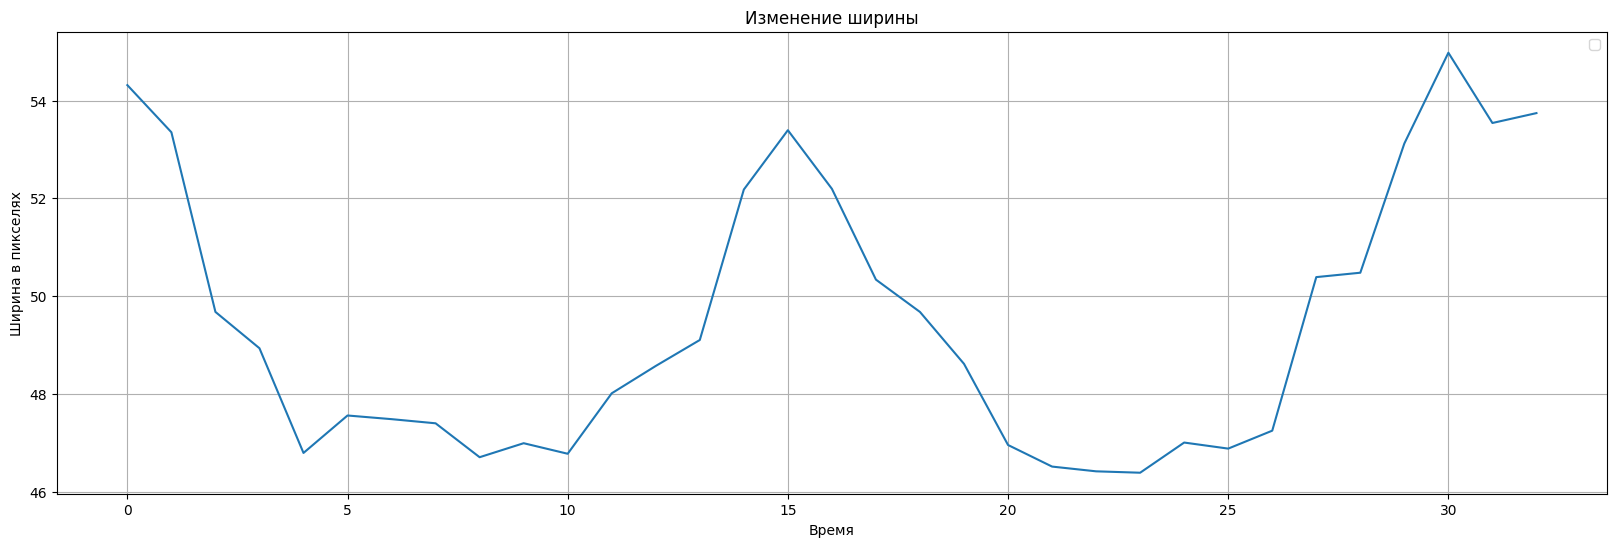

In [190]:
heart_video_info('/kaggle/input/hmcqu-dataset/HMC-QU/A4C/ES000108 _4CH_1.avi')

Количество кадров в секунду: 30.0
True
Отношение минимального к максимальному: 0.72488433
Отношение изменения к максимальному: 27.51


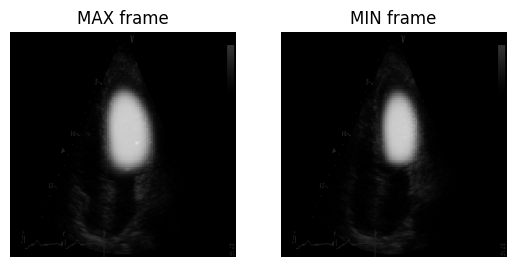

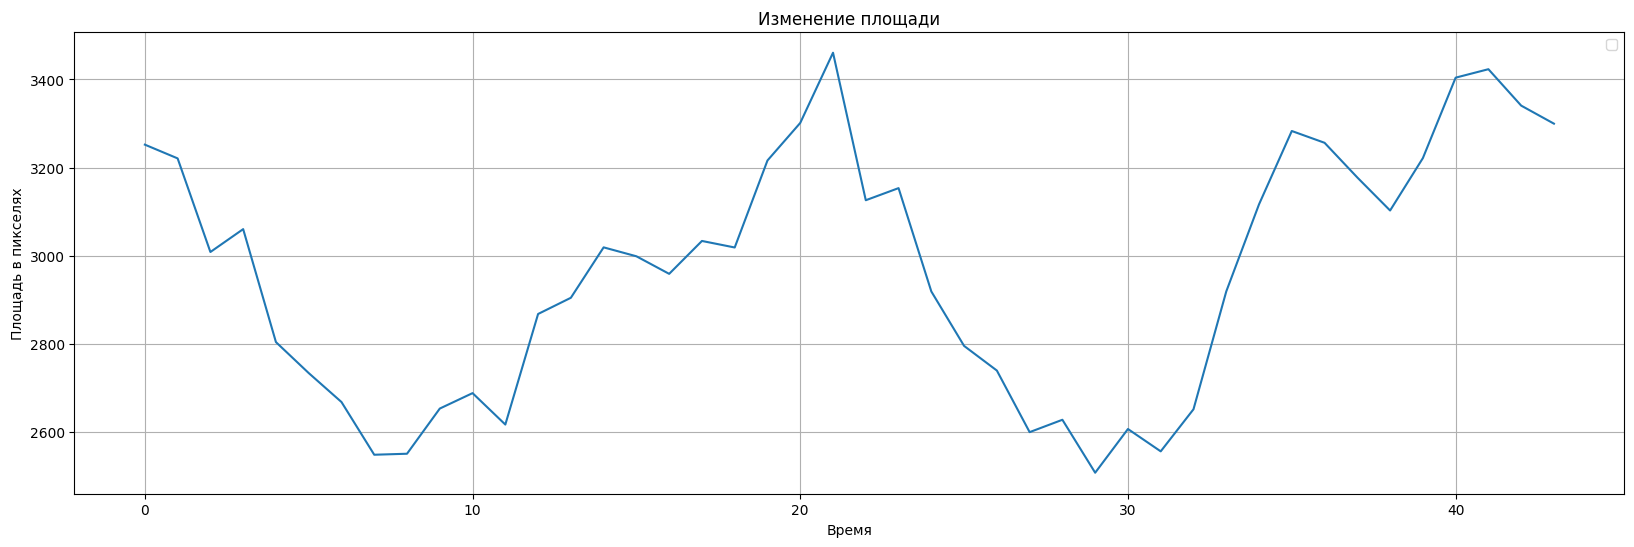

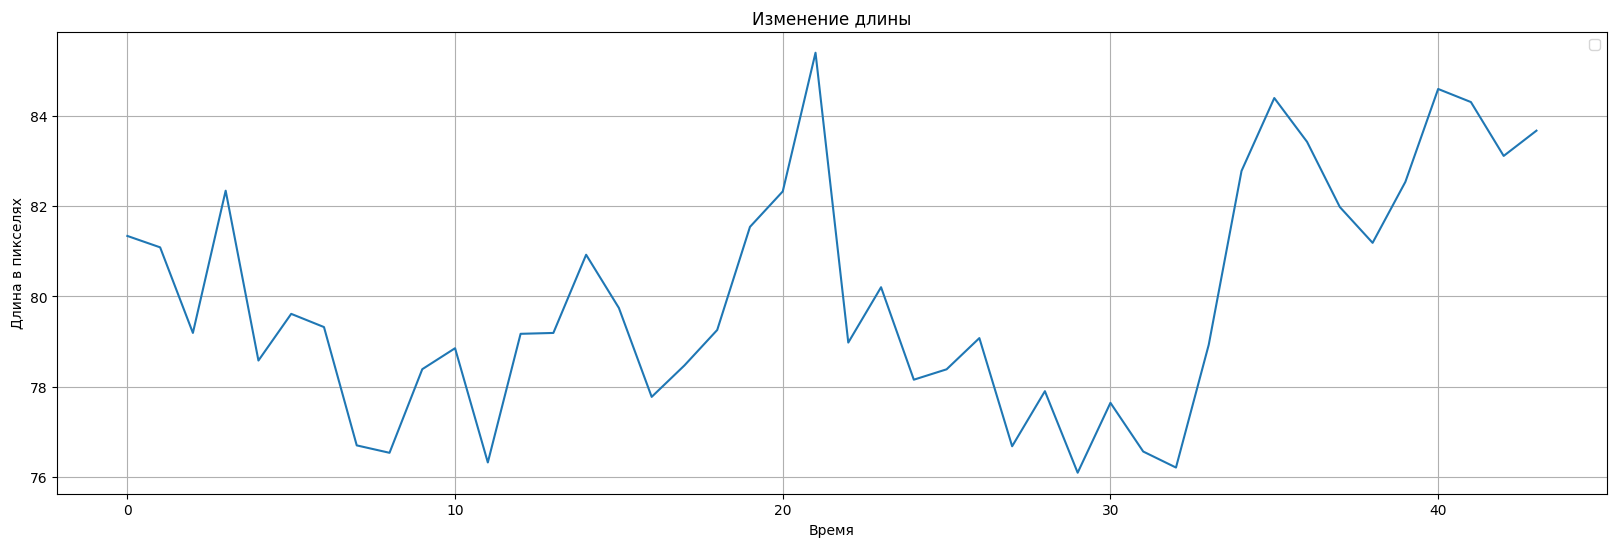

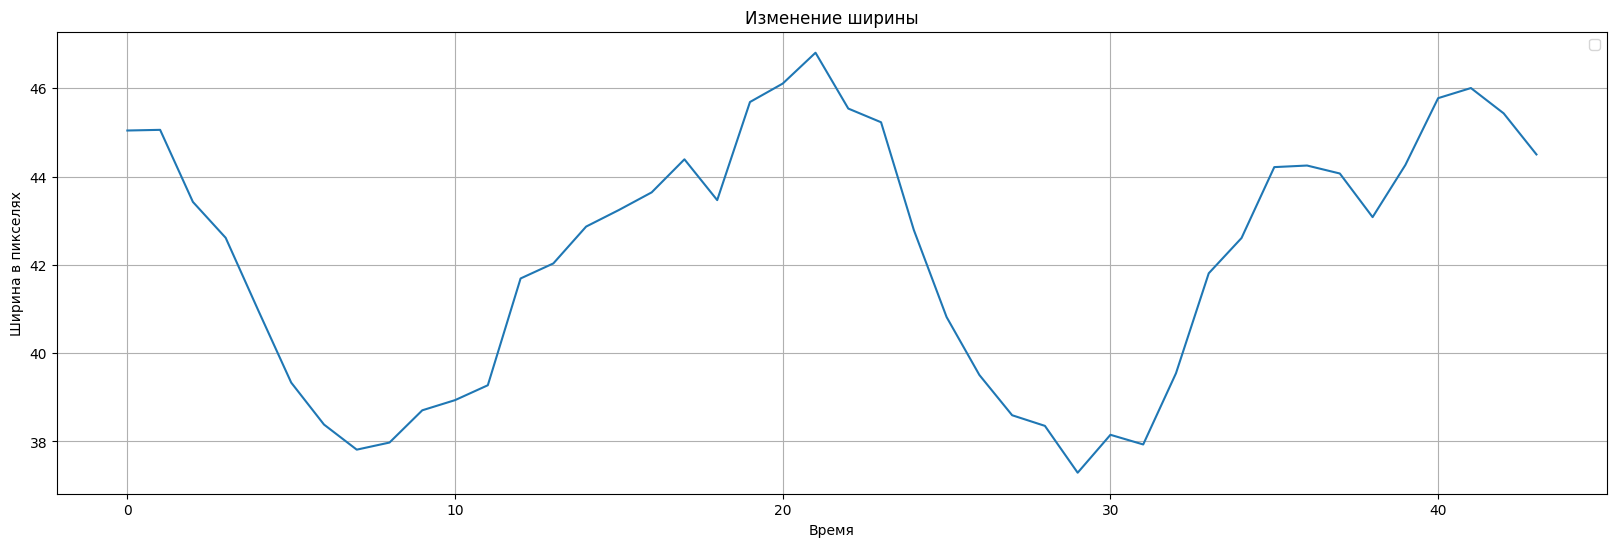

In [191]:
heart_video_info('/kaggle/input/hmcqu-dataset/HMC-QU/A4C/ES000124_4CH_1.avi')

Количество кадров в секунду: 30.0
True
Отношение минимального к максимальному: 0.65698576
Отношение изменения к максимальному: 34.3


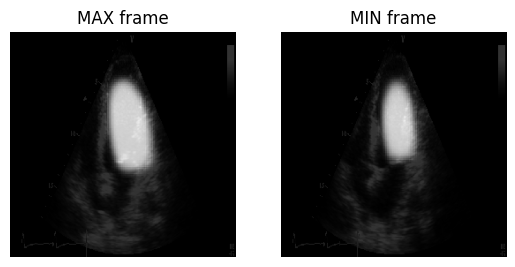

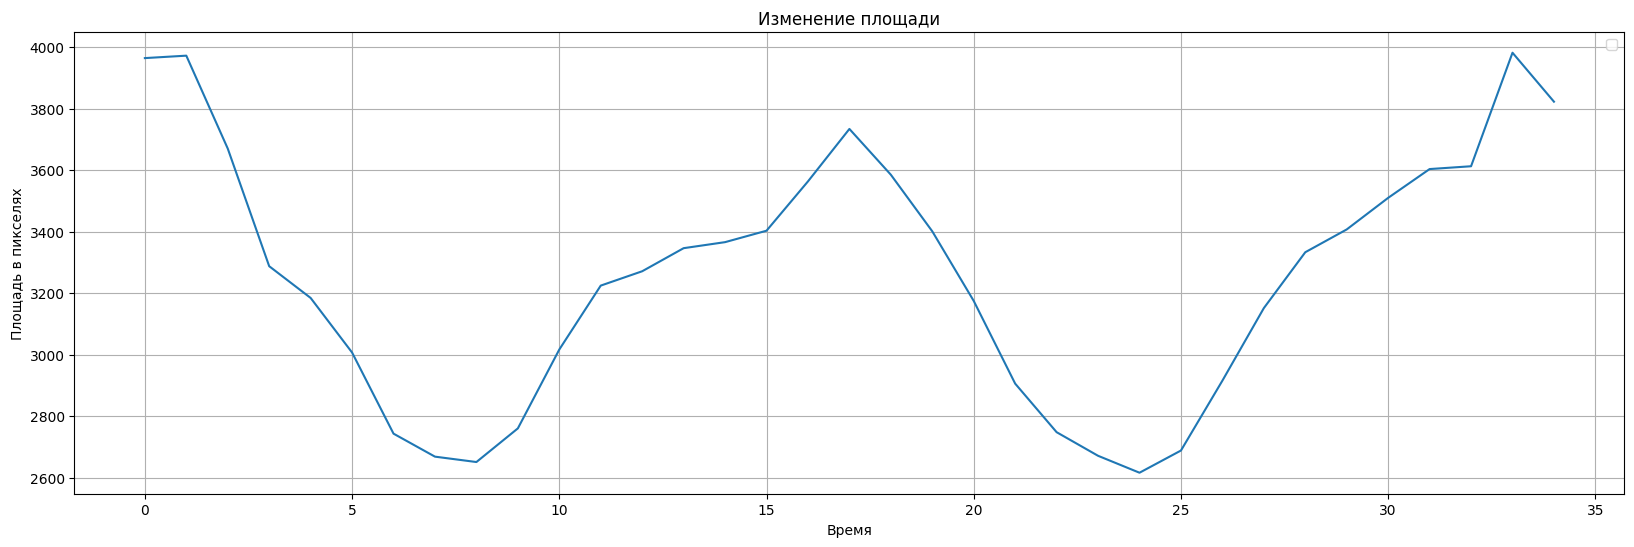

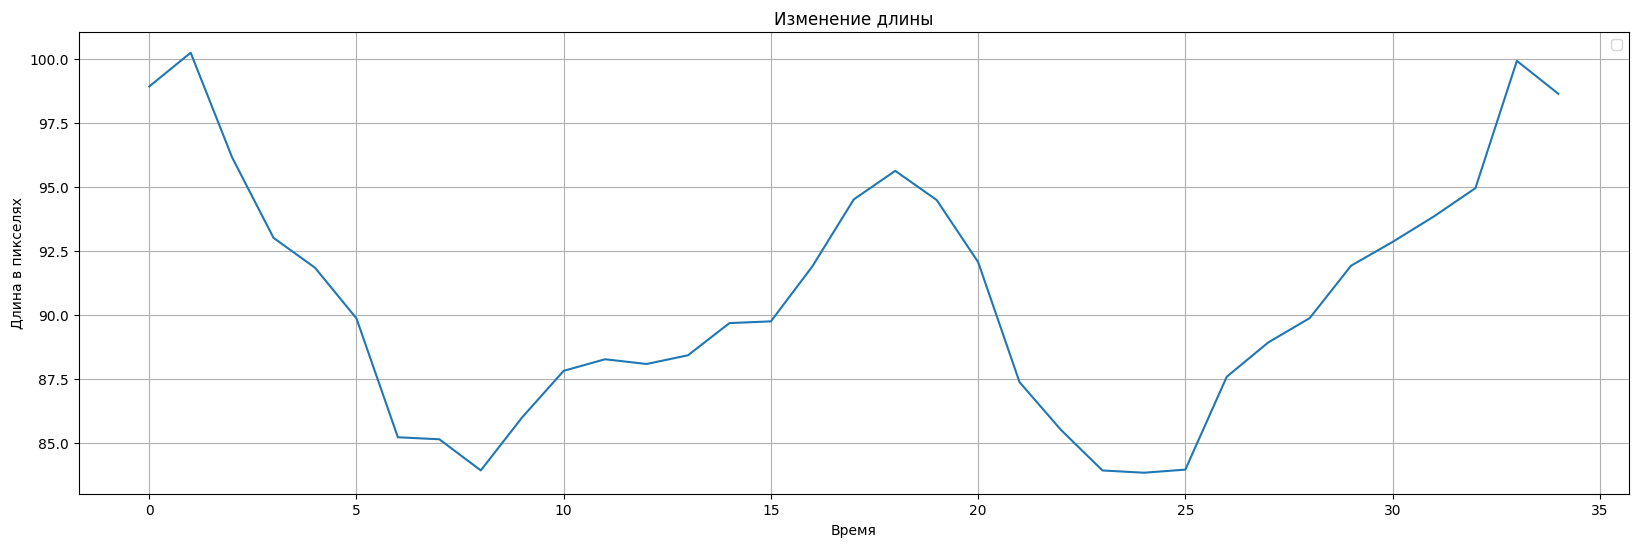

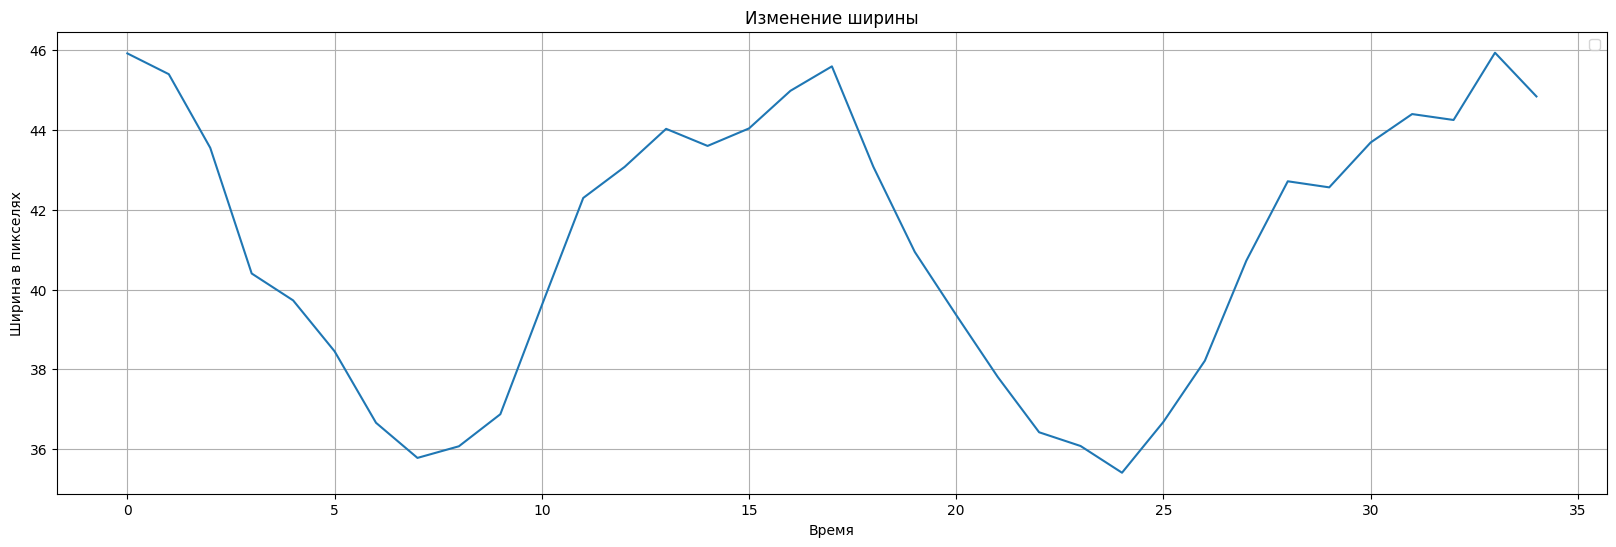

In [192]:
heart_video_info('/kaggle/input/hmcqu-dataset/HMC-QU/A4C/ES000106 _4CH_1.avi')

Количество кадров в секунду: 29.97002997002997
True
Отношение минимального к максимальному: 0.45909098
Отношение изменения к максимальному: 54.09


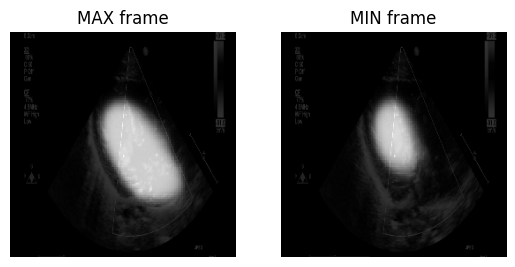

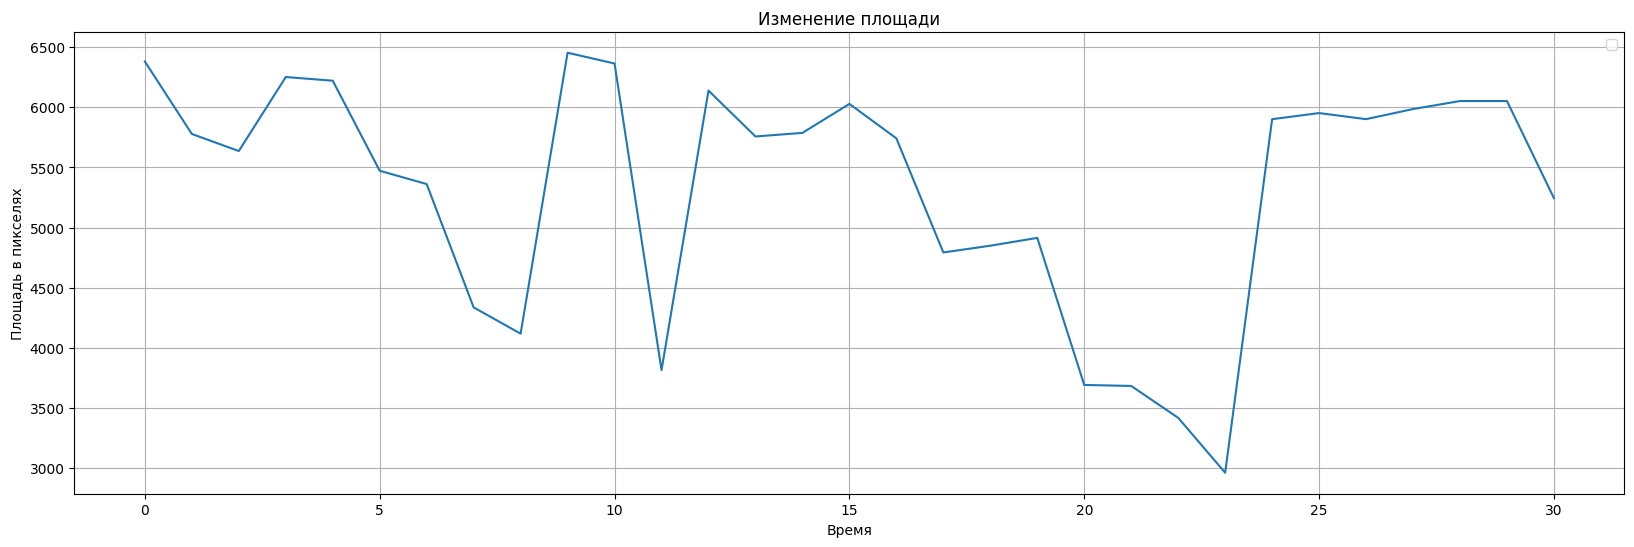

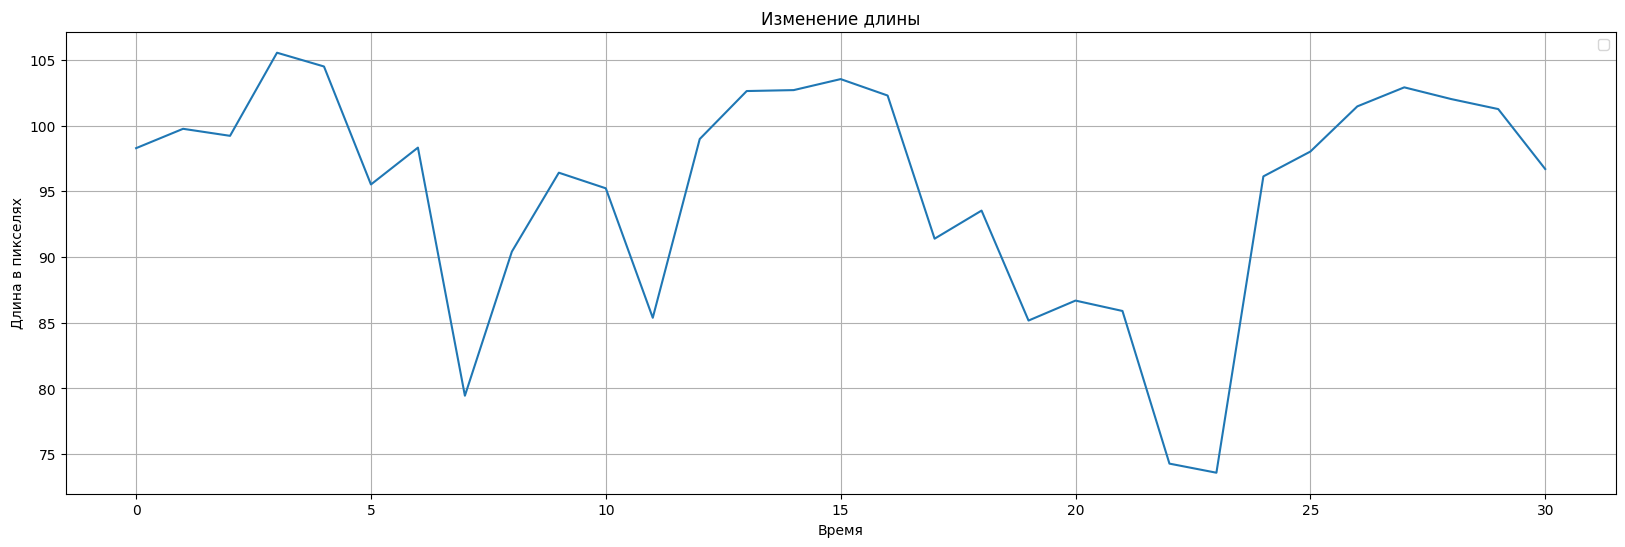

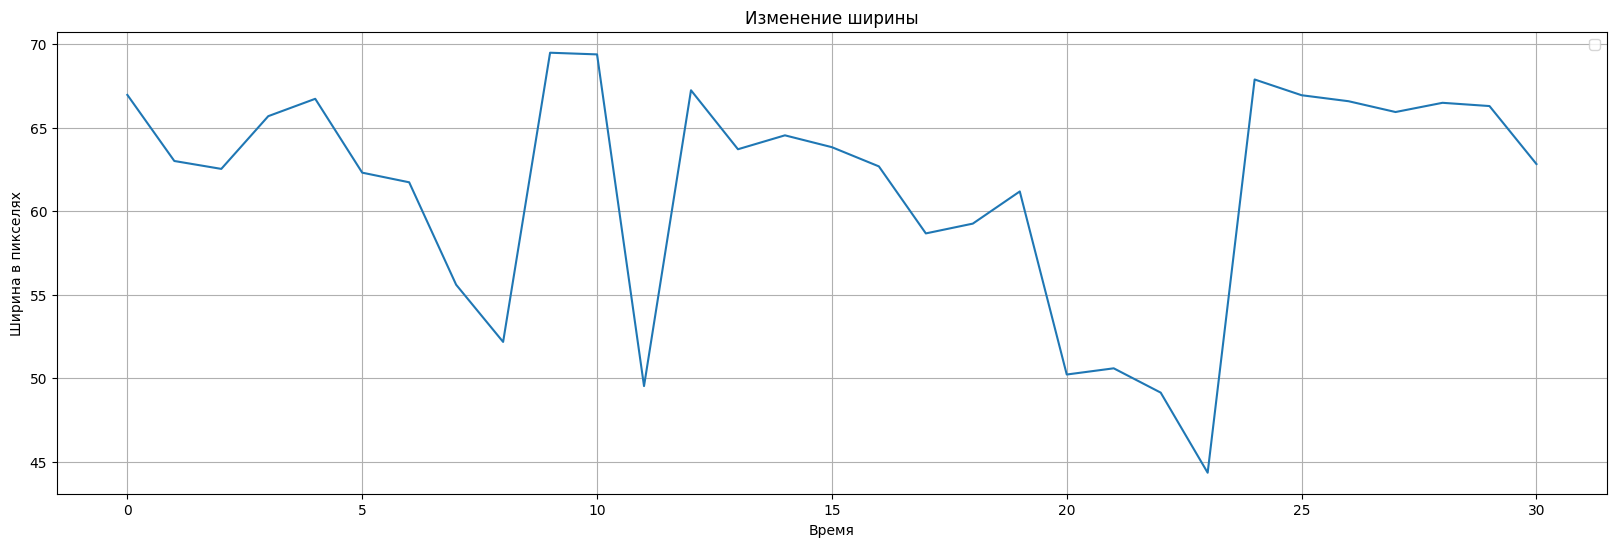

In [193]:
heart_video_info('/kaggle/input/echo-ekg/��樥�� �.mp4')

Количество кадров в секунду: 29.97002997002997
True
Отношение минимального к максимальному: 0.7090061
Отношение изменения к максимальному: 29.1


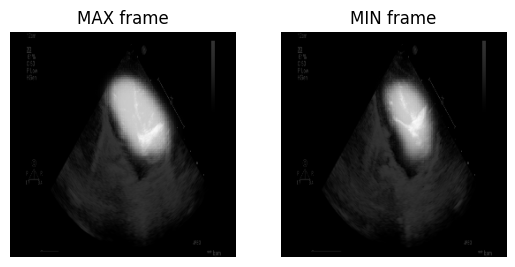

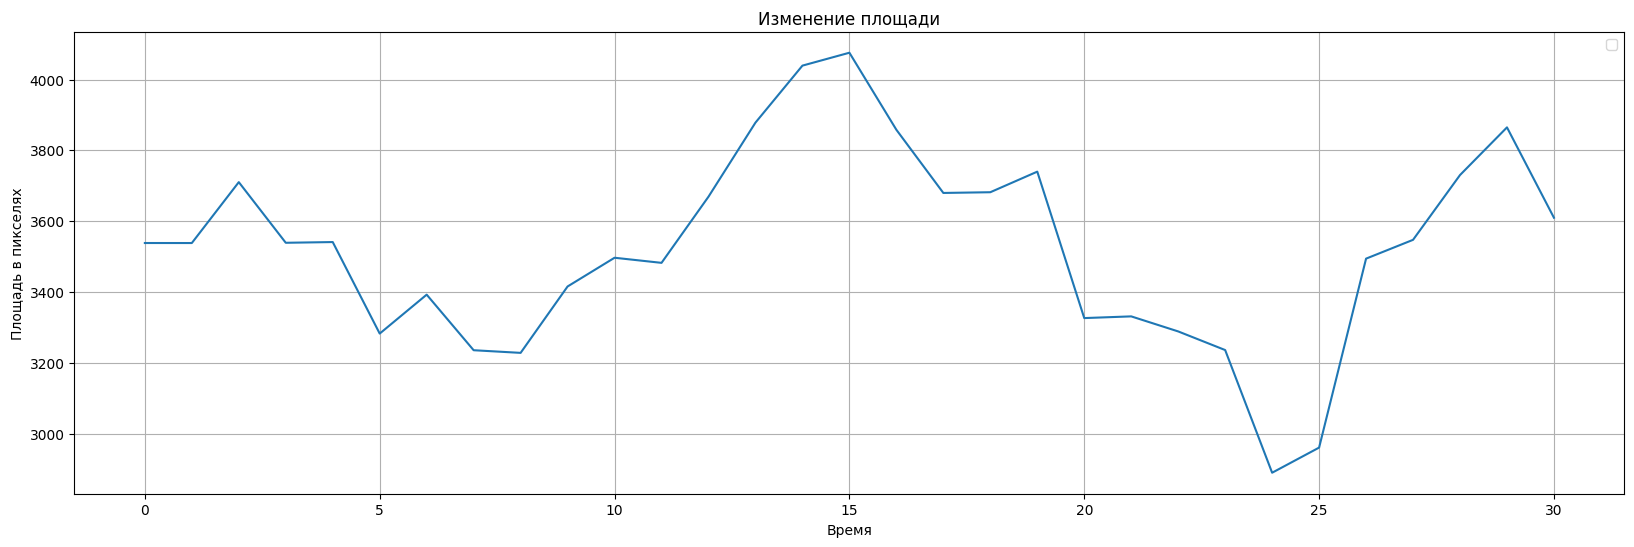

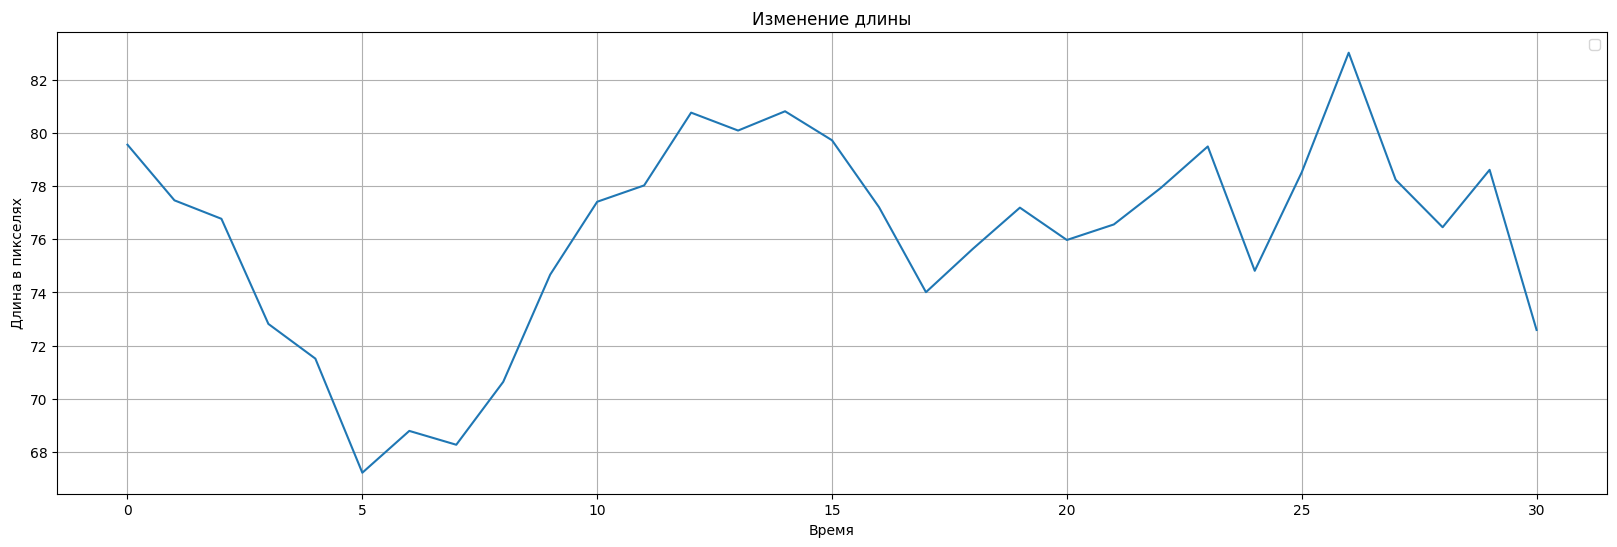

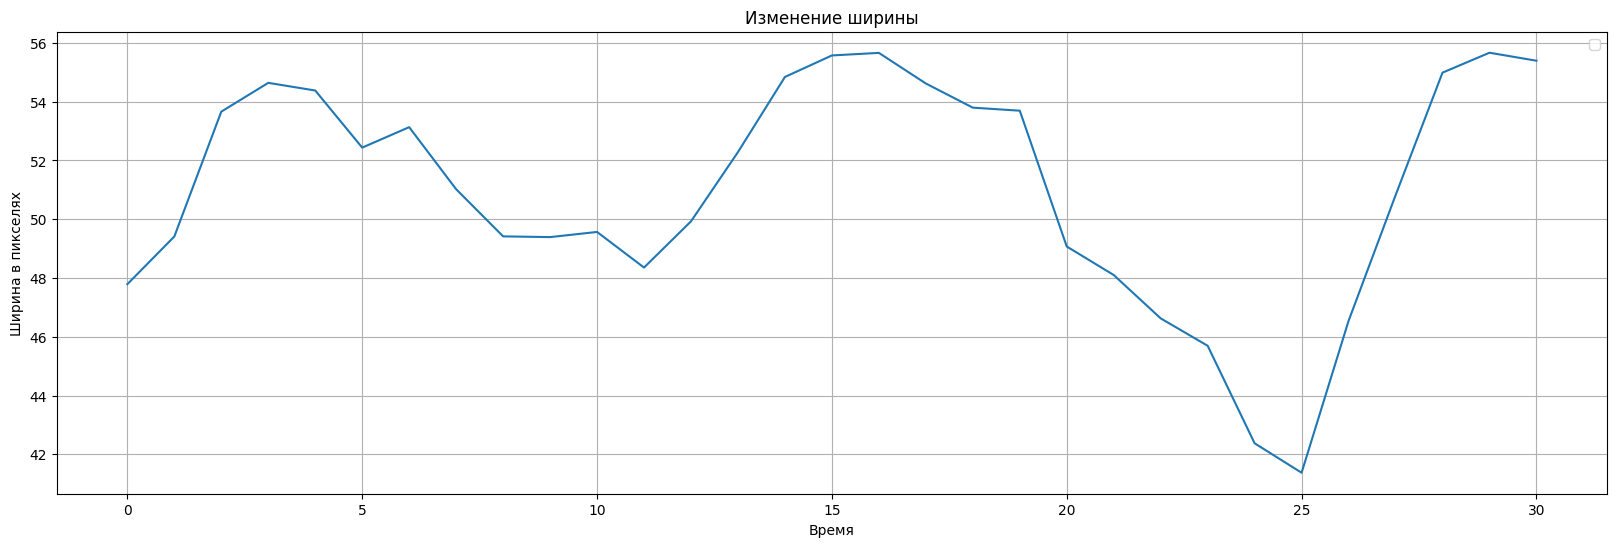

In [194]:
heart_video_info('/kaggle/input/echo-ekg/��樥�� ��.mp4')